In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

In [34]:
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score

In [35]:
import cv2, imutils
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
    [0, 180, 0, 256, 0, 256])
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

In [36]:
import os
import pandas as pd
cwd = os.getcwd()
print(cwd)
df = pd.read_csv(cwd + "\\..\\data_csv\\preprocessing_data.csv")
print(df)

d:\TU\2564_2\CN240\facial\neural_network
                                 image  emotion
0      facial-expressions_2868588k.jpg        0
1      facial-expressions_2868585k.jpg        7
2      facial-expressions_2868584k.jpg        2
3      facial-expressions_2868582k.jpg        3
4               Aaron_Eckhart_0001.jpg        5
...                                ...      ...
33298      SURPRISE/surprise (987).png        7
33299      SURPRISE/surprise (988).jpg        7
33300       SURPRISE/surprise (99).jpg        7
33301      SURPRISE/surprise (993).jpg        7
33302      SURPRISE/surprise (996).jpg        7

[33303 rows x 2 columns]


In [37]:
raw_images =  []
labels = []
for i, row in df.iterrows():
    image_path = row['image']
    label = row['emotion']
    full_image_path = os.path.dirname(cwd) + "\\cleaned_images\\" + image_path
    image = cv2.imread(full_image_path)
    pixels = extract_color_histogram(image)

    raw_images.append(pixels)
    labels.append(label)
    if i > 0 and i % 1000 == 0: print('[INFO] processed {}/{}'.format(i, len(df)))

[INFO] processed 1000/33303
[INFO] processed 2000/33303
[INFO] processed 3000/33303
[INFO] processed 4000/33303
[INFO] processed 5000/33303
[INFO] processed 6000/33303
[INFO] processed 7000/33303
[INFO] processed 8000/33303
[INFO] processed 9000/33303
[INFO] processed 10000/33303
[INFO] processed 11000/33303
[INFO] processed 12000/33303
[INFO] processed 13000/33303
[INFO] processed 14000/33303
[INFO] processed 15000/33303
[INFO] processed 16000/33303
[INFO] processed 17000/33303
[INFO] processed 18000/33303
[INFO] processed 19000/33303
[INFO] processed 20000/33303
[INFO] processed 21000/33303
[INFO] processed 22000/33303
[INFO] processed 23000/33303
[INFO] processed 24000/33303
[INFO] processed 25000/33303
[INFO] processed 26000/33303
[INFO] processed 27000/33303
[INFO] processed 28000/33303
[INFO] processed 29000/33303
[INFO] processed 30000/33303
[INFO] processed 31000/33303
[INFO] processed 32000/33303
[INFO] processed 33000/33303


In [47]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(np.array(raw_images), np.array(labels), test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

<class 'numpy.ndarray'> [[0.3298029  0.3113486  0.4972276  ... 0.         0.         0.        ]
 [0.17625485 0.30585727 0.32161003 ... 0.         0.         0.        ]
 [0.22843178 0.34751016 0.3415906  ... 0.         0.         0.        ]
 ...
 [0.1783699  0.44123647 0.4242617  ... 0.         0.         0.        ]
 [0.18133964 0.34290332 0.396603   ... 0.         0.         0.        ]
 [0.27194506 0.43572003 0.36318737 ... 0.         0.         0.        ]]


In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

<class 'numpy.ndarray'>


In [49]:
import tensorflow as tf

def classification_model_multi():
    model = Sequential()
    model.add(Dense(124, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def classification_model_bin():
    model = Sequential()
    model.add(Dense(124, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

D:\DownloadApplication\anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


ANGER
<class 'numpy.ndarray'> [[0.06371864 0.44149336 0.24265932 ... 0.         0.         0.        ]
 [0.07937567 0.36383924 0.28272468 ... 0.         0.         0.        ]
 [0.07744719 0.4058253  0.24549863 ... 0.         0.         0.        ]
 ...
 [0.03373284 0.10399405 0.19480246 ... 0.         0.         0.        ]
 [0.3770914  0.35567155 0.28794402 ... 0.         0.         0.        ]
 [0.16595338 0.23644875 0.40159863 ... 0.         0.         0.        ]]
Epoch 1/100


ValueError: in user code:

    D:\DownloadApplication\anaconda\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    D:\DownloadApplication\anaconda\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    D:\DownloadApplication\anaconda\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    D:\DownloadApplication\anaconda\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    D:\DownloadApplication\anaconda\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    D:\DownloadApplication\anaconda\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\keras\losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\keras\backend.py:5000 binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:245 sigmoid_cross_entropy_with_logits_v2
        return sigmoid_cross_entropy_with_logits(
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\DownloadApplication\anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 8) vs (None, 2))


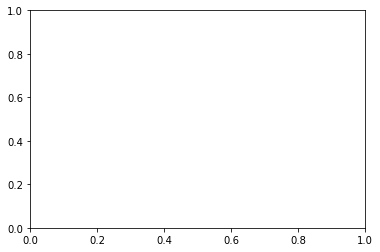

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

dictionary = ['ANGER', 'CONTEMPT', 'DISGUST', 'FEAR', 'HAPPINESS',  'NEUTRAL', 'SADNESS', 'SURPRISE']

for emo in range(8):
    print(dictionary[emo])

    emo_feature = []
    emo_target = []

    for i in range(len(df['emotion'])):
        if df['emotion'][i] == emo:
            emo_target.append(1)
        else:
            emo_target.append(0)
        
        imagePath = cwd + "/../cleaned_images/" + df['image'][i]
        image = cv2.imread(imagePath)
        pixels = extract_color_histogram(image)
        emo_feature.append(pixels)

    emo_feature = np.array(emo_feature)
    emo_target = np.array(emo_target)

    # import data
    X = X_train = emo_feature
    y = y_train = emo_target
    print(type(X_train), X_train)

    history = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots()

    # create model
    model = classification_model_bin()

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    for i, (train, val) in enumerate(cv.split(X_train, y_train)):
        X_train, X_val = X[train], X[val]
        y_train, y_val = y[train], y[val]

        le = preprocessing.LabelEncoder()
        le.fit(y_train)
        y_train = le.transform(y_train)
        y_val = le.transform(y_val)
        y_train = to_categorical(y_train)
        y_val = to_categorical(y_val)

        # fit model
        model.fit(X_train, y_train, validation_data=(X_val, y_val,), epochs=100, verbose=2)

        # predict
        y_pred = model.predict(X_val)
        clf_probs = model.predict_proba(X_val)

        # store model report in history list
        history.append(classification_report(y_val, y_pred))

        # get loss and accuracy
        acc = accuracy_score(y_val, y_pred)
        loss = log_loss(y_val, clf_probs)
        print(f'====================Fold {i}====================', '\n')
        print(f"accuracy_score : {acc}")
        print(f"log_loss : {loss}\n")

        # plot ROC curve
        viz = RocCurveDisplay.from_predictions(y_val, y_pred)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
    # middle line
    ax.plot([0, 1], [0, 1], 'k--')

    # mean line
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    # std
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            title="Receiver operating characteristic")
    ax.legend(loc="lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig('graph/' + dictionary[emo] + '/ann.jpg')
    plt.show()

In [ ]:
model = classification_model_multi()
model.fit(X_train, y_train, validation_data=(X_val, y_val,), epochs=100, verbose=2)

Epoch 1/100


C:\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


610/610 - 2s - loss: 2.5518 - accuracy: 0.1338 - val_loss: 2.3365 - val_accuracy: 0.1195 - 2s/epoch - 3ms/step
Epoch 2/100
610/610 - 1s - loss: 2.3193 - accuracy: 0.1549 - val_loss: 2.2985 - val_accuracy: 0.1769 - 1s/epoch - 2ms/step
Epoch 3/100
610/610 - 1s - loss: 2.2905 - accuracy: 0.1748 - val_loss: 2.2610 - val_accuracy: 0.1949 - 1s/epoch - 2ms/step
Epoch 4/100
610/610 - 1s - loss: 2.2603 - accuracy: 0.1837 - val_loss: 2.2362 - val_accuracy: 0.2024 - 1s/epoch - 2ms/step
Epoch 5/100
610/610 - 1s - loss: 2.2405 - accuracy: 0.1921 - val_loss: 2.2219 - val_accuracy: 0.1982 - 1s/epoch - 2ms/step
Epoch 6/100
610/610 - 1s - loss: 2.2313 - accuracy: 0.1893 - val_loss: 2.2146 - val_accuracy: 0.2032 - 1s/epoch - 2ms/step
Epoch 7/100
610/610 - 1s - loss: 2.2212 - accuracy: 0.1971 - val_loss: 2.2096 - val_accuracy: 0.2058 - 1s/epoch - 2ms/step
Epoch 8/100
610/610 - 1s - loss: 2.2178 - accuracy: 0.1942 - val_loss: 2.2082 - val_accuracy: 0.2044 - 1s/epoch - 2ms/step
Epoch 9/100
610/610 - 1s - l

In [ ]:
value = model.predict(X_test)
y_pred =np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       579
           1       0.00      0.00      0.00       536
           2       0.00      0.00      0.00       636
           3       0.12      0.01      0.02       641
           4       0.18      0.05      0.08      1120
           5       0.17      0.50      0.25      1164
           6       0.00      0.00      0.00       741
           7       0.23      0.12      0.16       803
           8       0.00      0.00      0.00        46
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00      1066
          13       0.22      0.80      0.35      1249
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        62

    accuracy                           0.20      8669
   macro avg       0.06   

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
value = model.predict(X_test)
y_pred = np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

In [ ]:
y_pred_arr = list(y_pred)
print("len : ", len(y_pred_arr))
score = 0
for i in range(len(y_pred_arr)):
    if(list(y_pred)[i] == list(y_true)[i]): score += 1
max_score = len(list(y_pred))
print(f"Final Score : {score}/{max_score}")
print("Accuracy : ", 100 * score / max_score)


len :  8669
Final Score : 1739/8669
Accuracy :  20.059983850501787


In [ ]:
# Hyperparameter Process #

In [ ]:
from scipy.integrate import odeint
# Parameters and time for FOPDT model
ns = 10000
t = np.linspace(0,ns-1,ns)
u = np.zeros(ns)
# Additional FOPDT parameters
yp0 = 0.0
u0 = u[0]
Km = 0.67
taum = 160.0
def fopdt(y,t,um,Km,taum):
    # arguments
    #  y      = output
    #  t      = time
    #  uf     = input linear function (for time shift)
    #  Km     = model gain
    #  taum   = model time constant
    # calculate derivative
    dydt = (-(y-yp0) + Km * (um-u0))/taum
    return dydt

def sim_model(Km,taum):
    # array for model values
    ym = np.zeros(ns)
    # initial condition
    ym[0] = yp0
    # loop through time steps    
    for i in range(0,ns-1):
        ts = [t[i],t[i+1]]
        y1 = odeint(fopdt,ym[i],ts,args=(u[i],Km,taum))
        ym[i+1] = y1[-1]
    return ym

In [ ]:
import random
end = 60 # leave 1st minute of u as 0
while end <= ns:
    start = end
    end += random.randint(300,900) # keep new Q1s value for anywhere from 5 to 15 minutes
    u[start:end] = random.randint(0,100)

In [ ]:
# Simulate FOPDT model
y = sim_model(Km,taum)

In [ ]:
# Add Gaussian noise
noise = np.random.normal(0,0.2,ns)
y += noise

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scale data
data = np.vstack((u,y)).T
s = MinMaxScaler(feature_range=(0,1))
data_s = s.fit_transform(data)